In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
df=pd.read_csv('diabetes.csv')


In [ ]:
df.columns= [None] *df.shape[1]


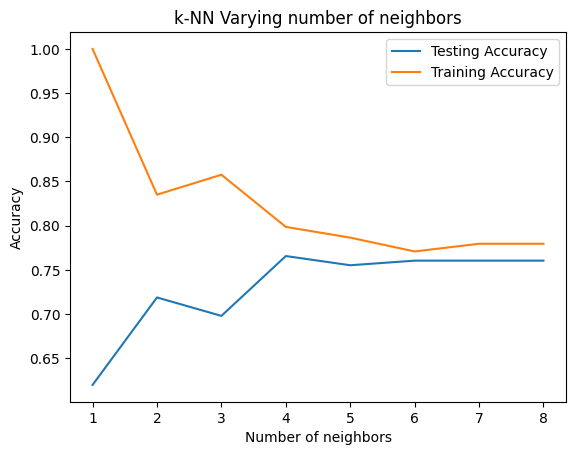

The best number of neighbors is: 4
Test accuracy with best k (4): 0.765625


In [ ]:

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Try different values of k (number of neighbors)
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)

  test_accuracy[i] = knn.score(X_test, y_test)

# Plot the accuracy for different values of k
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

best_k = neighbors[np.argmax(test_accuracy)]
print(f"The best number of neighbors is: {best_k}")

# Train the final model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the final model
test_accuracy_best_k = best_knn.score(X_test, y_test)
print(f"Test accuracy with best k ({best_k}): {test_accuracy_best_k}")

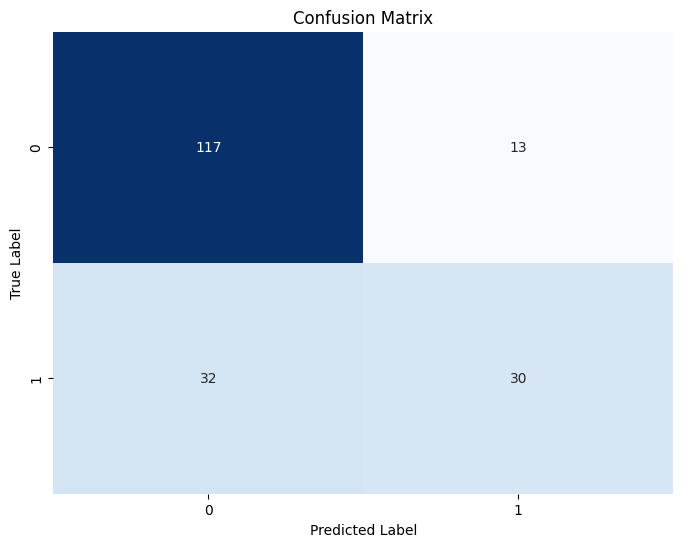

In [ ]:

y_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

np.int64(8)